# Predicting Life Expectancy using Machine Learning
#### Author: Krishnagopal Halder
#### Project Description:
Numerous studies have been conducted in the past on factors that impact life expectancy, taking into account demographic variables, income composition, and mortality rates. However, these studies have neglected to consider the influence of immunization and the human development index. Additionally, some past research relied on a single-year dataset for all countries and utilized multiple linear regression. To address these issues, this study aims to develop a regression model based on mixed effects model and multiple linear regression, utilizing data spanning the period from 2000 to 2015 for all countries. The study will consider key immunization factors such as Hepatitis B, Polio, and Diphtheria, as well as other factors such as mortality, economics, and social factors, in order to gain a comprehensive understanding of the factors that contribute to life expectancy. By examining data from different countries, this study will help countries identify which factors are most strongly correlated with lower life expectancy values, and offer guidance for prioritizing areas for improvement to efficiently improve the life expectancy of their populations.

## 01. Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
%matplotlib inline

## 02. Importing Dataset
**Metadata Information:**
* **Country:** Country
* **Year:** Year
* **Status:** Developed or Developing status
* **Life expectancy:** Life Expectancy in age
* **Adult Mortality:** Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* **infant deaths:** Number of Infant Deaths per 1000 population
* **Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* **percentage expenditure:** Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* **Hepatitis B:** Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* **Measles:** Measles - number of reported cases per 1000 population
* **BMI:** Average Body Mass Index of entire population
* **under-five deaths:** Number of under-five deaths per 1000 population
* **Polio:** Polio (Pol3) immunization coverage among 1-year-olds (%)
* **Total expenditure:** General government expenditure on health as a percentage of total government expenditure (%)
* **Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* **HIV/AIDS:** Deaths per 1 000 live births HIV/AIDS (0-4 years)
* **GDP:** Gross Domestic Product per capita (in USD)
* **Population:** Population of the country
* **thinness 1-19 years:** Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* **thinness 5-9 years:** Prevalence of thinness among children for Age 5 to 9(%)
* **Income composition of resources:** Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* **Schooling:** Number of years of Schooling(years)

In [2]:
# Reading the Life Expectancy Data.csv using Pandas
path = "D:\Coding\Git Repository\Data-Science-Bootcamp-with-Python\Datasets\Life Expectancy Data.csv"
df = pd.read_csv(path)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 03. Data Visualization

In [3]:
# Dropping the columns which contain qualitative values
df.drop(["Country", "Status"], axis=1, inplace=True)
df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<Axes: title={'center': 'Correlation Matrix'}>

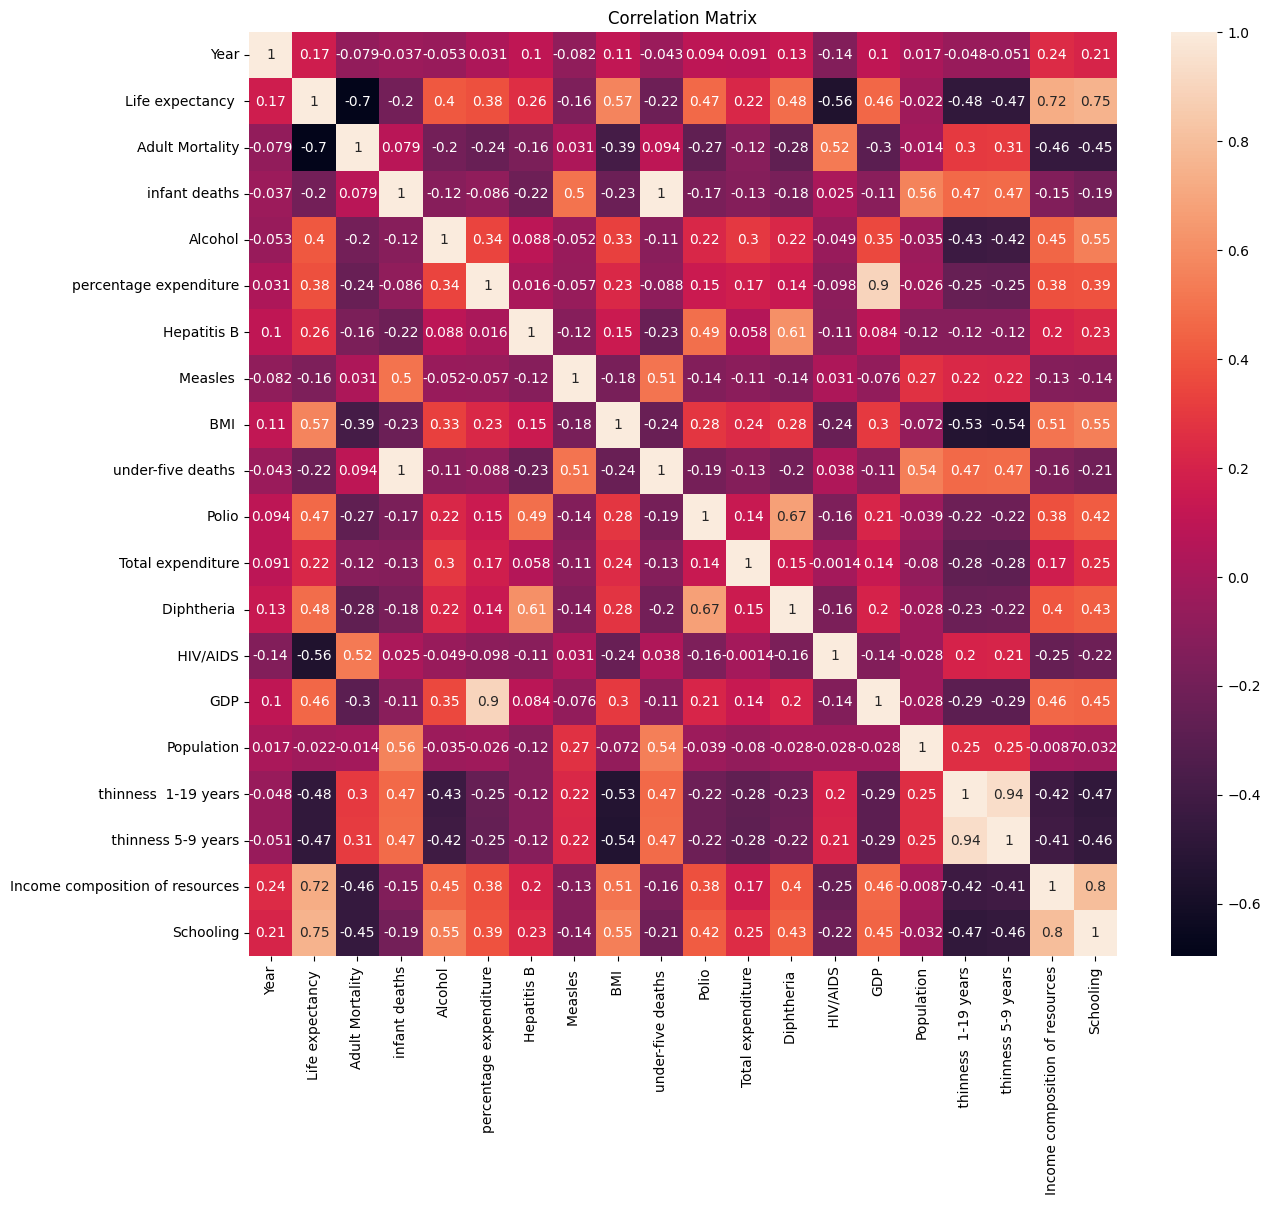

In [4]:
# Plotting correlation matrix
plt.figure(figsize=(14, 12))
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True)

## 04. Data Preprocessing

In [5]:
# Checking the shape of the dataframe
df.shape

(2938, 20)

In [6]:
# Dropping the rows with Null values
df.dropna(inplace=True)
df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
# Checking the shape of the data after dropping rows with null values
df.shape

(1649, 20)

## 05. Preparing Data for Training and Testing

In [8]:
# Selecting independent variables
x = df.drop("Life expectancy ", axis=1).values
# Selecting dependent variable
y = df["Life expectancy "].values

In [9]:
# Splitting the data into training and testing set
# Training data = 70% and Testing data = 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=75)

## 06. Implementing Linear Regression Model

In [10]:
# Creating Linear Regression object
lin_reg = linear_model.LinearRegression()
# Training the model with training data
lin_reg.fit(x_train, y_train)

LinearRegression()

## 07. Finding the Multiple Linear Equation
In multiple linear regression, the equation takes the form of:

**y = b0 + b1x1 + b2x2 + ... + bnxn**

where y is the dependent variable, x1, x2, ..., xn are the independent variables, b0 is the intercept, and b1, b2, ..., bn are the coefficients that represent the impact of each independent variable on the dependent variable.

In [11]:
# Getting the intercept (b0)
intercept = lin_reg.intercept_
print("Intercept:", intercept.round(4))

Intercept: 294.6671


In [12]:
# Getting the coefficients (b1, b2, ....., bn)
coefficients = lin_reg.coef_
# Printing all the coefficients
for i in range(len(coefficients)):
    print(f"b{i+1} = {coefficients[i].round(4)}", end=", ")

b1 = -0.1209, b2 = -0.0155, b3 = 0.0738, b4 = -0.1065, b5 = 0.0004, b6 = -0.0033, b7 = -0.0, b8 = 0.031, b9 = -0.0557, b10 = 0.0066, b11 = 0.0994, b12 = 0.0159, b13 = -0.4637, b14 = 0.0, b15 = -0.0, b16 = -0.092, b17 = 0.0386, b18 = 11.7172, b19 = 0.8605, 

## 08. Predicting the Life Expectancy(y) of x_test Data 

In [13]:
# Predicting the y value based on x_test data
y_predicted = lin_reg.predict(x_test)

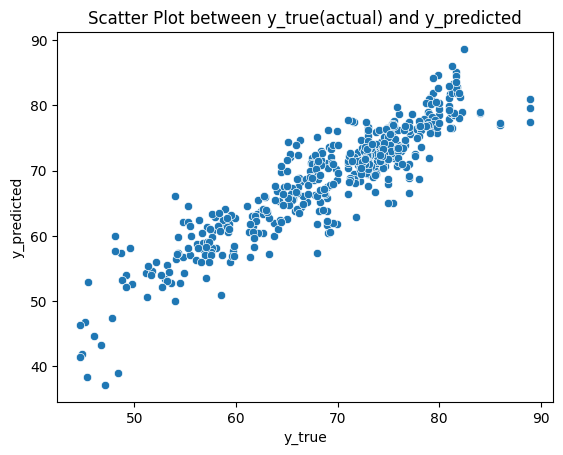

In [14]:
# Plotting scatter diagram between y_test(actual) and y_predicted data
sns.scatterplot(x=y_test, y=y_predicted)
plt.xlabel("y_true")
plt.ylabel("y_predicted")
plt.title("Scatter Plot between y_true(actual) and y_predicted")
plt.show()

## 09. Validation of the Model

In [15]:
# Calculating the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predicted)
print("Mean Absolute Error(MAE) =", mae.round(4))

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error(MSE) =", mse.round(4))

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error(RMSE) =", rmse.round(4))

Mean Absolute Error(MAE) = 2.7465
Mean Squared Error(MSE) = 12.9831
Root Mean Squared Error(RMSE) = 3.6032
